In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


In [3]:
class_names = ['あ', 'い', 'う', 'え', 'お', 'か', 'き', 'く', 'け', 'こ', 'さ', 'し', 'す', 'せ', 'そ',
               'た', 'ち', 'つ', 'て', 'と', 'な', 'に', 'ぬ', 'ね', 'の', 'は', 'ひ', 'ふ', 'へ', 'ほ',
               'ま', 'み', 'む', 'め', 'も', 'や', 'ゆ', 'よ', 'ら', 'り', 'る', 'れ', 'ろ', 'わ', 'ゐ', 
               'ゑ', 'を', 'ん']

In [2]:
def kana_to_unicode( kana:str ):
    assert len(kana)==1
    return 'U+' + hex(ord(kana))[2:]
def unicode_to_kana( code:str ):
    # Example: unicode_to_kana('U+304A')
    assert len(code)==6
    return chr(int(code[2:],16))

['あ',
 'い',
 'う',
 'え',
 'お',
 'か',
 'き',
 'く',
 'け',
 'こ',
 'さ',
 'し',
 'す',
 'せ',
 'そ',
 'た',
 'ち',
 'つ',
 'て',
 'と',
 'な',
 'に',
 'ぬ',
 'ね',
 'の',
 'は',
 'ひ',
 'ふ',
 'へ',
 'ほ',
 'ま',
 'み',
 'む',
 'め',
 'も',
 'や',
 'ゆ',
 'よ',
 'ら',
 'り',
 'る',
 'れ',
 'ろ',
 'わ',
 'ゐ',
 'ゑ',
 'を',
 'ん']

In [12]:
x = [kana_to_unicode(x).upper() for x in class_names]
[(z[0], z[1]) for z in zip(x, class_names)]

[('U+3042', 'あ'),
 ('U+3044', 'い'),
 ('U+3046', 'う'),
 ('U+3048', 'え'),
 ('U+304A', 'お'),
 ('U+304B', 'か'),
 ('U+304D', 'き'),
 ('U+304F', 'く'),
 ('U+3051', 'け'),
 ('U+3053', 'こ'),
 ('U+3055', 'さ'),
 ('U+3057', 'し'),
 ('U+3059', 'す'),
 ('U+305B', 'せ'),
 ('U+305D', 'そ'),
 ('U+305F', 'た'),
 ('U+3061', 'ち'),
 ('U+3064', 'つ'),
 ('U+3066', 'て'),
 ('U+3068', 'と'),
 ('U+306A', 'な'),
 ('U+306B', 'に'),
 ('U+306C', 'ぬ'),
 ('U+306D', 'ね'),
 ('U+306E', 'の'),
 ('U+306F', 'は'),
 ('U+3072', 'ひ'),
 ('U+3075', 'ふ'),
 ('U+3078', 'へ'),
 ('U+307B', 'ほ'),
 ('U+307E', 'ま'),
 ('U+307F', 'み'),
 ('U+3080', 'む'),
 ('U+3081', 'め'),
 ('U+3082', 'も'),
 ('U+3084', 'や'),
 ('U+3086', 'ゆ'),
 ('U+3088', 'よ'),
 ('U+3089', 'ら'),
 ('U+308A', 'り'),
 ('U+308B', 'る'),
 ('U+308C', 'れ'),
 ('U+308D', 'ろ'),
 ('U+308F', 'わ'),
 ('U+3090', 'ゐ'),
 ('U+3091', 'ゑ'),
 ('U+3092', 'を'),
 ('U+3093', 'ん')]

In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [4]:
import pathlib
data_root = pathlib.Path('dataset/train_kana/')
print(data_root)

dataset\train_kana


In [5]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

# all_image_paths = all_image_paths[:6000]
image_count = len(all_image_paths)
image_count

388145

In [30]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())

In [31]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))

In [32]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [46, 18, 18, 11, 40, 18, 39, 46, 28, 21]


In [33]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [64, 64])
  image /= 255.0  # normalize to [0,1] range

  return image

In [34]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

In [35]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [36]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

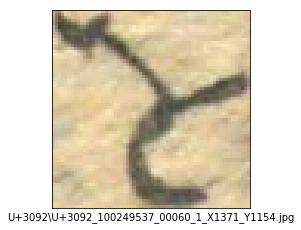

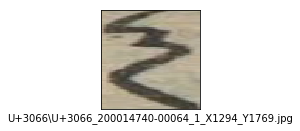

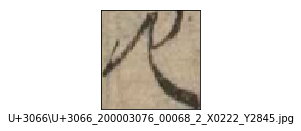

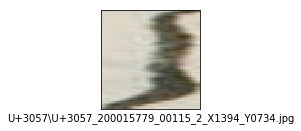

In [37]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return (image_rel)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(caption_image(all_image_paths[n]))
  plt.show()

In [38]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [39]:
for label in label_ds.take(10):
  print(label)

tf.Tensor(46, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(40, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(39, shape=(), dtype=int64)
tf.Tensor(46, shape=(), dtype=int64)
tf.Tensor(28, shape=(), dtype=int64)
tf.Tensor(21, shape=(), dtype=int64)


In [40]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
image_label_ds

<ZipDataset shapes: ((64, 64, 3), ()), types: (tf.float32, tf.int64)>

In [41]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 64, 64, 3), (None,)), types: (tf.float32, tf.int64)>

In [42]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 64, 64, 3), (None,)), types: (tf.float32, tf.int64)>

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(label_names), activation='softmax')
])

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
len(model.trainable_variables)

4

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1572992   
_________________________________________________________________
dense_3 (Dense)              (None, 48)                6192      
Total params: 1,579,184
Trainable params: 1,579,184
Non-trainable params: 0
_________________________________________________________________


In [47]:
steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

12130.0

In [47]:
model.fit(ds, epochs=1)

 9462/12130 [======================>.......] - ETA: 51:35 - loss: 3.0411 - accuracy: 0.1856


KeyboardInterrupt



KeyboardInterrupt: 

In [1]:
a = 'data/custom/images/'

In [2]:
b = '.jpg'

In [4]:
for i in range(100, 201):
    print(a + str(i) + b)

data/custom/images/100.jpg
data/custom/images/101.jpg
data/custom/images/102.jpg
data/custom/images/103.jpg
data/custom/images/104.jpg
data/custom/images/105.jpg
data/custom/images/106.jpg
data/custom/images/107.jpg
data/custom/images/108.jpg
data/custom/images/109.jpg
data/custom/images/110.jpg
data/custom/images/111.jpg
data/custom/images/112.jpg
data/custom/images/113.jpg
data/custom/images/114.jpg
data/custom/images/115.jpg
data/custom/images/116.jpg
data/custom/images/117.jpg
data/custom/images/118.jpg
data/custom/images/119.jpg
data/custom/images/120.jpg
data/custom/images/121.jpg
data/custom/images/122.jpg
data/custom/images/123.jpg
data/custom/images/124.jpg
data/custom/images/125.jpg
data/custom/images/126.jpg
data/custom/images/127.jpg
data/custom/images/128.jpg
data/custom/images/129.jpg
data/custom/images/130.jpg
data/custom/images/131.jpg
data/custom/images/132.jpg
data/custom/images/133.jpg
data/custom/images/134.jpg
data/custom/images/135.jpg
data/custom/images/136.jpg
d